18 October 2023

https://carmengg.github.io/eds-220-book/lectures/lesson-6-groupby.html

# `groupby()`

In [1]:
import pandas as pd

# read in Palmer penguins data
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Summary Statistics

`pandas` lets us use:
- `sum()`: sum values in each column,
- `count()`: count non-NA values in each column,
- `min()` and `max()`: get the minimum and maximum value in each column,
- `mean()` and `median()`: get the mean and median value in each column,
- `std()` and `var()`: get the standard deviation and variance in each column.

In [3]:
# get the number of non-NA values in each column 
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [4]:
# get the minimum value in each column
penguins.select_dtypes('number').min()

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## Grouping

In pamlerpenguins, there are natural groupings of species, sex, and island. We often want to calculate stats for each group.

**Split-Apply-Combine strategy**
- **Split**: Split the data into logical groups (e.g. species, sex, island, etc.)
- **Apply**: Calculate some summary statistic on each group (e.g. average flipper length by species, number of individuals per island, body mass by sex, etc.)
- **Combine**: Combine the statistic calculated on each group back together

We can do this in Python by using `groupby()`

```
df.groupby(columns_to_group_by)
```

In [5]:
penguins.flipper_length_mm.mean()

200.91520467836258

In [6]:
# average flipper length per species
penguins.groupby("species").flipper_length_mm.mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

<AxesSubplot:title={'center':'Average flipper length by species'}, xlabel='species', ylabel='Flipper length (mm)'>

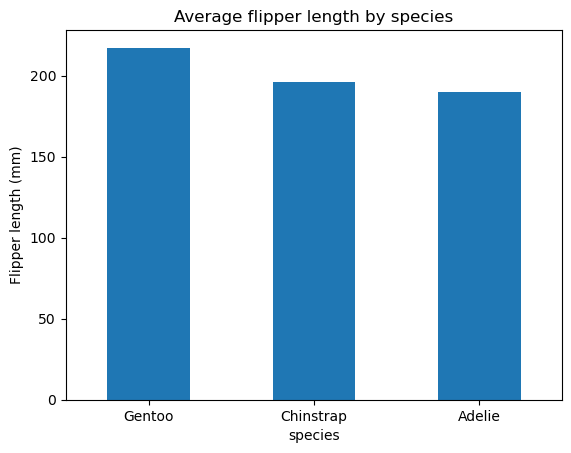

In [7]:
# average flipper length per species
avg_flipper = penguins.groupby("species").flipper_length_mm.mean()

# sort in descending order
# remember to reassign to actually update data
avg_flipper = avg_flipper.sort_values(ascending=False)

# plot as a bar plot
avg_flipper.plot(kind='bar',
                 title='Average flipper length by species',
                 ylabel='Flipper length (mm)',
                 rot=360  # rotation for ticks 
                 ) 

In [8]:
penguins.groupby(['island','year']).count()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    year                                                              
Biscoe    2007       44              44             44                 44   
          2008       64              64             64                 64   
          2009       60              59             59                 59   
Dream     2007       46              46             46                 46   
          2008       34              34             34                 34   
          2009       44              44             44                 44   
Torgersen 2007       20              19             19                 19   
          2008       16              16             16                 16   
          2009       16              16             16                 16   

                body_mass_g  sex  
island    year                    
Biscoe    2007           44   43  
          2008           64   63  
          2009           59   57  
Dream     2007           46   45  
          2008           34   34  
          2009           44   44  
Torgersen 2007           19   15  
          2008           16   16  
          2009           16   16

<AxesSubplot:ylabel='island,year'>

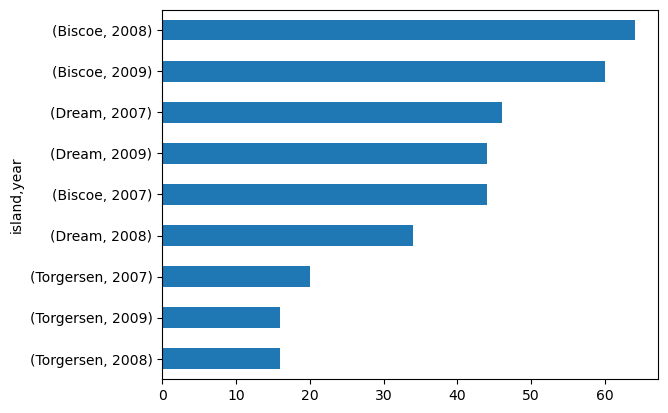

In [9]:
penguins.groupby(['island','year']).count().species.sort_values().plot(kind='barh')

## Practice Check-In

1. Use groupby and the max() method for data frames to calculate the maximum value of penguin’s body mass by year and species.
2. Use (1) to display the highest body masses per year and species as a bar plot in descending order.

In [22]:
penguins.groupby(['year','species']).body_mass_g.max()

year  species  
2007  Adelie       4675.0
      Chinstrap    4400.0
      Gentoo       6300.0
2008  Adelie       4700.0
      Chinstrap    4800.0
      Gentoo       6000.0
2009  Adelie       4775.0
      Chinstrap    4450.0
      Gentoo       6000.0
Name: body_mass_g, dtype: float64

<AxesSubplot:title={'center':'Maximum Body Mass (g)'}, ylabel='year,species'>

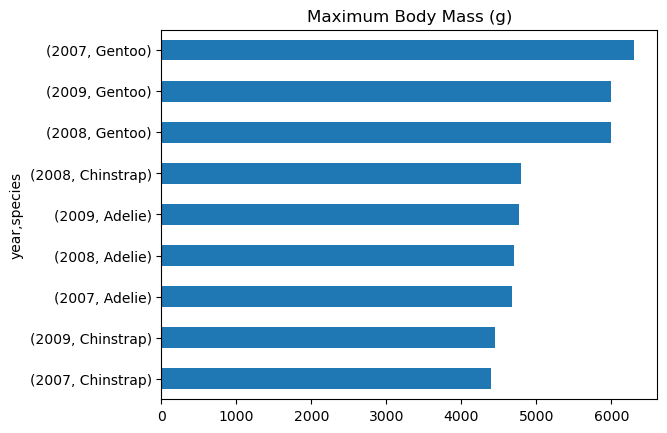

In [21]:
penguins.groupby(['year','species']).max('body_mass_g').body_mass_g.sort_values().plot(kind = 'barh', title='Maximum Body Mass (g)')